# DS 5100 Project Notebook 
Connie Cui (qqv3uu)

We first started out by importing all necessary packages needed to conduct our exploratory data analysis, model selection with machine learning, and unit testing, as well as our dataset itself.

In [1]:
# load packages and dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import imblearn
from imblearn.over_sampling import RandomOverSampler
import re
import seaborn as sns

#import different models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

#import other miscellaneous packages
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import GroupShuffleSplit
from sklearn.metrics import roc_curve

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/covid_cleaned.csv')
df.head()

# df = pd.read_csv('/covid_cleaned.csv')

Mounted at /content/drive


,Unnamed: 0,sex,patient_type,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,died
0,0,0.0,1.0,0.0,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1.0,1.0,0.0,56,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
2,2,1.0,1.0,0.0,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,3,1.0,1.0,0.0,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,4,1.0,1.0,0.0,49,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


## Exploratory Data Analysis and Visualizations
In this section, we analyze our data and explore the relationships between our different variables. We also explore things such as the shape of our data, our variable data types, whether or not we have missing values, and summary statistics of our variables.



In [ ]:
df.shape

(346017, 18)

In [ ]:
#Finding data types
dataType = df.dtypes
print(dataType)

Unnamed: 0               int64
sex                    float64
patient_type           float64
pneumonia              float64
age                      int64
diabetes               float64
copd                   float64
asthma                 float64
inmsupr                float64
hypertension           float64
other_disease          float64
cardiovascular         float64
obesity                float64
renal_chronic          float64
tobacco                float64
contact_other_covid    float64
covid_res              float64
died                   float64
dtype: object


In [ ]:
 # Finding out number of null values in each variable
df.isnull().sum()
#There is no null or missing values in any variable.

Unnamed: 0             0
sex                    0
patient_type           0
pneumonia              0
age                    0
diabetes               0
copd                   0
asthma                 0
inmsupr                0
hypertension           0
other_disease          0
cardiovascular         0
obesity                0
renal_chronic          0
tobacco                0
contact_other_covid    0
covid_res              0
died                   0
dtype: int64

In [ ]:
#Summmary Statistics
#df[["Estimate(IMF)", "Estimate(UN)", "Estimate(World Bank)"]].describe()


df.describe()


,Unnamed: 0,sex,patient_type,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,died
count,346017.000000,346017.000000,346017.000000,346017.000000,346017.000000,346017.000000,346017.000000,346017.000000,346017.000000,346017.000000,346017.000000,346017.000000,346017.000000,346017.000000,346017.000000,346017.000000,346017.000000,346017.000000
mean,173008.000000,0.492510,0.847664,0.129306,41.465844,0.107353,0.012754,0.030204,0.012953,0.139135,0.016095,0.020002,0.158692,0.014225,0.087192,0.569238,0.403541,0.038504
std,99886.648385,0.499945,0.359347,0.335539,16.410673,0.309562,0.112210,0.171148,0.113072,0.346088,0.125840,0.140007,0.365389,0.118416,0.282117,0.495184,0.490608,0.192410
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,86504.000000,0.000000,1.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,173008.000000,0.000000,1.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,259512.000000,1.000000,1.000000,0.000000,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,346016.000000,1.000000,1.000000,1.000000,120.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


See the count distribution of our response variable. It appears that there is a great imbalance, which we will need to make note of for future analysis.

In [ ]:
# see many died vs didn't die
count_classes = pd.value_counts(df['died'])
count_classes

0.0    332694
1.0     13323
Name: died, dtype: int64

Text(0, 0.5, 'Number of Patients')

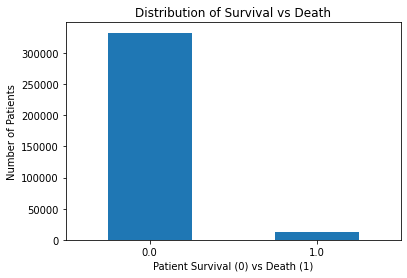

In [ ]:
count_classes = pd.value_counts(df['died'])
count_classes.plot(kind = 'bar', rot=0)
plt.title("Distribution of Survival vs Death")
plt.xlabel("Patient Survival (0) vs Death (1)")
plt.ylabel("Number of Patients")

Distribution of the Age variable for patients

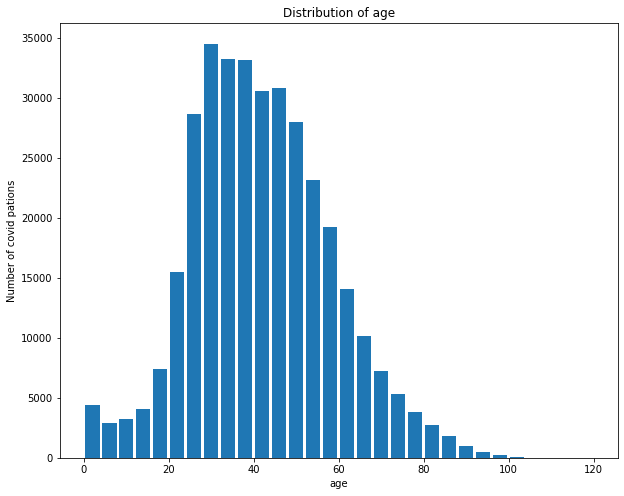

In [ ]:
# Histogram
fig = plt.figure(figsize = (10,8))

ax1 = fig.add_subplot(1,1,1)

ax1.hist(df['age'],bins = 30, rwidth = 0.85)
ax1.set_xlabel('age')
ax1.set_ylabel('Number of covid pations')
ax1.set_title("Distribution of age");

In [ ]:
#df['age_bins']=pd.cut(df.age, 25)
#df[['died','age','age_bins']].head(100)

bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120]
labels = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120]
df['age_bins1']=pd.cut(df.age,bins=bins,labels=labels)

In [ ]:
table=pd.crosstab(df.age_bins1,df.died)
table.head()

died,0.0,1.0
age_bins1,,
5,3499,63
10,3808,13
15,4877,22
20,10607,41
25,25213,105


Text(0, 0.5, 'Proportion of Covid Patients')

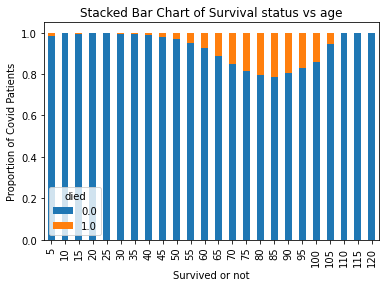

In [ ]:
table=pd.crosstab(df.age_bins1,df.died)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Survival status vs age')
plt.xlabel('Survived or not')
plt.ylabel('Proportion of Covid Patients')

Text(0, 0.5, 'Proportion of Covid Patients')

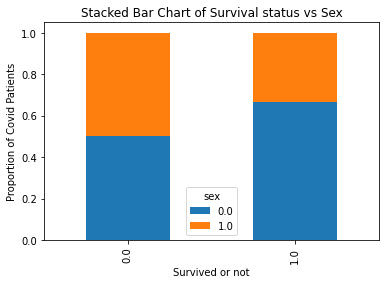

In [ ]:
table=pd.crosstab(df.died,df.sex)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Survival status vs Sex')
plt.xlabel('Survived or not')
plt.ylabel('Proportion of Covid Patients')

Text(0, 0.5, 'Proportion of Covid Patients')

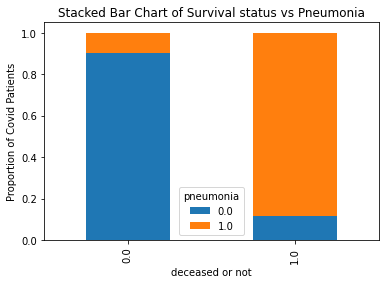

In [ ]:
table=pd.crosstab(df.died,df.pneumonia)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Survival status vs Pneumonia')
plt.xlabel('deceased or not')
plt.ylabel('Proportion of Covid Patients')

Text(0, 0.5, 'Proportion of Covid Patients')

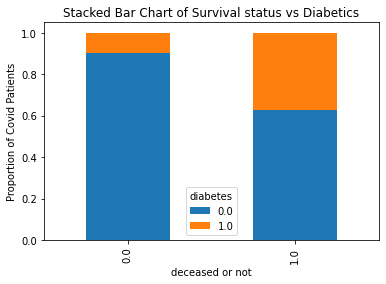

In [ ]:
table=pd.crosstab(df.died,df.diabetes)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Survival status vs Diabetics')
plt.xlabel('deceased or not')
plt.ylabel('Proportion of Covid Patients')

Text(0, 0.5, 'Proportion of Covid Patients')

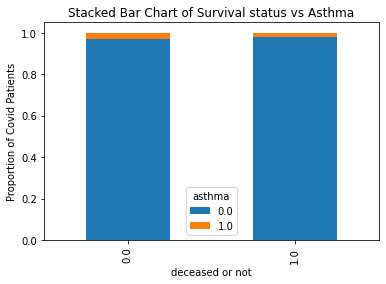

In [ ]:
table=pd.crosstab(df.died,df.asthma)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Survival status vs Asthma')
plt.xlabel('deceased or not')
plt.ylabel('Proportion of Covid Patients')

Text(0, 0.5, 'Proportion of Covid Patients')

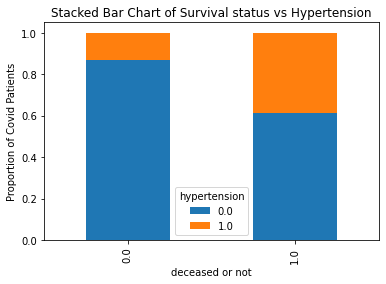

In [ ]:
table=pd.crosstab(df.died,df.hypertension)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Survival status vs Hypertension')
plt.xlabel('deceased or not')
plt.ylabel('Proportion of Covid Patients')

Text(0, 0.5, 'Proportion of Covid Patients')

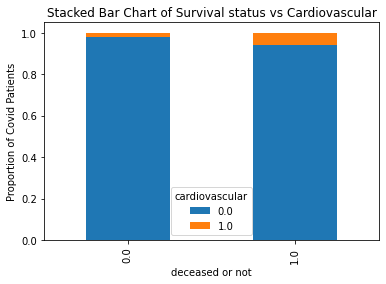

In [ ]:
table=pd.crosstab(df.died,df.cardiovascular)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Survival status vs Cardiovascular')
plt.xlabel('deceased or not')
plt.ylabel('Proportion of Covid Patients')

Text(0, 0.5, 'Proportion of Covid Patients')

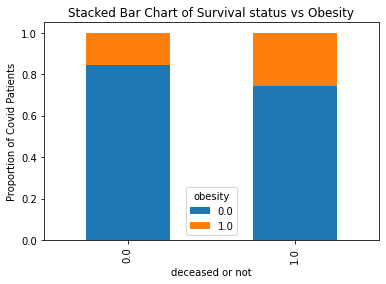

In [ ]:
table=pd.crosstab(df.died,df.obesity)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Survival status vs Obesity')
plt.xlabel('deceased or not')
plt.ylabel('Proportion of Covid Patients')

Text(0, 0.5, 'Proportion of Covid Patients')

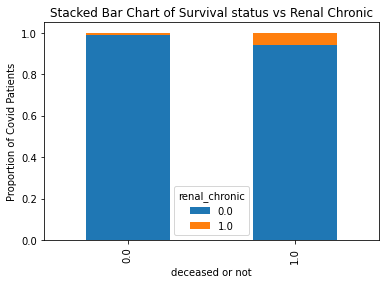

In [ ]:
table=pd.crosstab(df.died,df.renal_chronic)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Survival status vs Renal Chronic')
plt.xlabel('deceased or not')
plt.ylabel('Proportion of Covid Patients')

Text(0, 0.5, 'Proportion of Covid Patients')

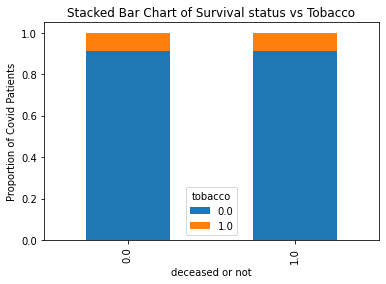

In [ ]:
table=pd.crosstab(df.died,df.tobacco)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Survival status vs Tobacco')
plt.xlabel('deceased or not')
plt.ylabel('Proportion of Covid Patients')

Text(0, 0.5, 'Proportion of Covid Patients')

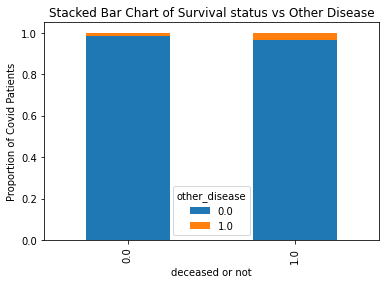

In [ ]:
table=pd.crosstab(df.died,df.other_disease)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Survival status vs Other Disease')
plt.xlabel('deceased or not')
plt.ylabel('Proportion of Covid Patients')

Text(0, 0.5, 'Proportion of Covid Patients')

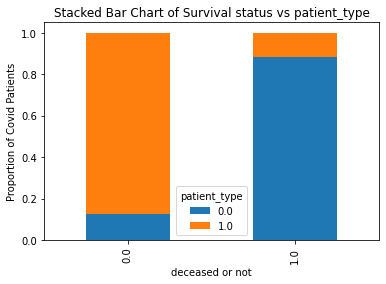

In [ ]:
table=pd.crosstab(df.died,df.patient_type)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Survival status vs patient_type')
plt.xlabel('deceased or not')
plt.ylabel('Proportion of Covid Patients')

Text(0, 0.5, 'Proportion of Covid Patients')

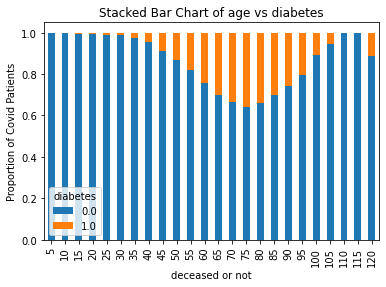

In [ ]:
table=pd.crosstab(df.age_bins1,df.diabetes)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of age vs diabetes')
plt.xlabel('deceased or not')
plt.ylabel('Proportion of Covid Patients')

Text(0, 0.5, 'Proportion of Covid Patients')

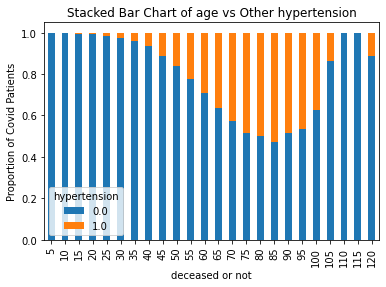

In [ ]:
table=pd.crosstab(df.age_bins1,df.hypertension)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of age vs Other hypertension')
plt.xlabel('deceased or not')
plt.ylabel('Proportion of Covid Patients')

Text(0, 0.5, 'Proportion of Covid Patients')

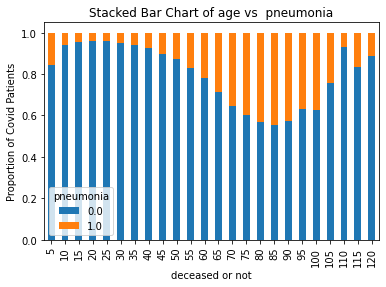

In [ ]:
table=pd.crosstab(df.age_bins1,df.pneumonia)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of age vs  pneumonia')
plt.xlabel('deceased or not')
plt.ylabel('Proportion of Covid Patients')

Text(0, 0.5, 'Proportion of Covid Patients')

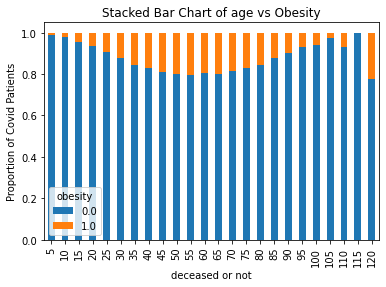

In [ ]:
table=pd.crosstab(df.age_bins1,df.obesity)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of age vs Obesity')
plt.xlabel('deceased or not')
plt.ylabel('Proportion of Covid Patients')

Text(0, 0.5, 'Proportion of Covid Patients')

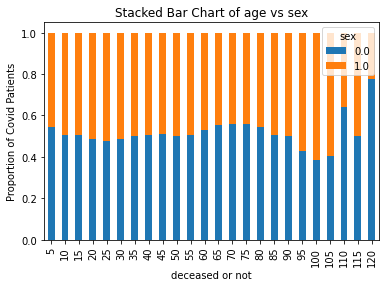

In [ ]:
table=pd.crosstab(df.age_bins1,df.sex)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of age vs sex')
plt.xlabel('deceased or not')
plt.ylabel('Proportion of Covid Patients')

## Model Selection with Machine Learning
This section of our code focuses on using our data to find the optimal model for predicting whether or not a hopsitalized patient is likely to die from COVID depending on the other predictor variables in our dataset. We first start out with separating our dataset into X and y datasets.


In [2]:
df = pd.read_csv('/content/drive/MyDrive/covid_cleaned.csv')
X = df.drop(["died", "Unnamed: 0"],axis= 1)
y = df[["died"]].values
X.head()

,sex,patient_type,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res
0,0.0,1.0,0.0,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,0.0,56,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,1.0,1.0,0.0,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,1.0,0.0,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1.0,1.0,0.0,49,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


We then split our data into training and test sets. This is used to ensure that our model is effective not just on the data it is trained and built upon.

In [3]:
#split training data into training and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7, 
                                                    random_state=5100)

### Creating a Logistic Regression model with the original dataset
Create a logistic regression model and train it on our X train and y train datasets to help create our predictions for the X test values.

In [ ]:
# log reg for og dataset
logreg = LogisticRegression(max_iter=500)

#fit the model with data
lr_model = logreg.fit(X_train, y_train)

y_logreg_pred = logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Create a confusion matric to evaluate how well the model was able to predict

In [ ]:
#create a confusion matrix to see how well the model did in predicting true positives
lr_cnf_matrix = metrics.confusion_matrix(y_test, y_logreg_pred)
lr_cnf_matrix

array([[99150,   670],
       [ 3344,   642]])

We also printed several different types of metric scores as reference.

In [ ]:
#print scores for a clearer idea
print("Accuracy:", metrics.accuracy_score(y_test, y_logreg_pred))
print("Precision:", metrics.precision_score(y_test, y_logreg_pred))
print("Recall:", metrics.recall_score(y_test, y_logreg_pred))
print("F1 Score:", metrics.f1_score(y_test, y_logreg_pred))
print("AUC:", metrics.roc_auc_score(y_test, y_logreg_pred))

Accuracy: 0.9613317149297729
Precision: 0.4893292682926829
Recall: 0.16106372303060712
F1 Score: 0.24235560588901475
AUC: 0.5771758206417311


Create and ROC curve to help visualize the model's effectiveness

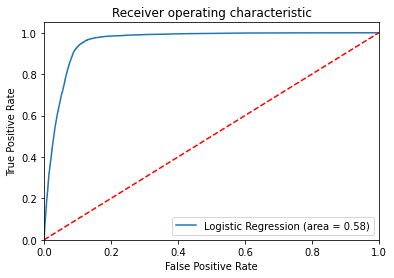

In [ ]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The predict_prob function is tested below and will be used for our user input section when we help predict a separate user's own survival rate given their own pre-existing conditions.

In [ ]:
# this function will allow us to return the probability of death or survival for user data
logreg.predict_proba(X_test)

array([[0.99776078, 0.00223922],
       [0.86519023, 0.13480977],
       [0.99643805, 0.00356195],
       ...,
       [0.99832469, 0.00167531],
       [0.99800363, 0.00199637],
       [0.98271633, 0.01728367]])

### Creating a Decision Tree with the original dataset
Create a decision tree model and train it on our X train and y train datasets to help create our predictions for the X test values. The following blocks of code follow the same pattern as show for the logistic regression: model fitting, confusion matrix, metric scores, and ROC curve.

In [ ]:
# decision tree for og dataset

dt = DecisionTreeClassifier()
dt_model= dt.fit(X_train, y_train)

y_dt_pred = dt.predict(X_test)

In [ ]:
#create a confusion matrix to see how well the model did in predicting true positives
dt_cnf_matrix = metrics.confusion_matrix(y_test, y_dt_pred)
dt_cnf_matrix

array([[98415,  1405],
       [ 3178,   808]])

In [ ]:
#print scores for a clearer idea
print("Accuracy:", metrics.accuracy_score(y_test, y_dt_pred))
print("Precision:", metrics.precision_score(y_test, y_dt_pred))
print("Recall:", metrics.recall_score(y_test, y_dt_pred))
print("F1 Score:", metrics.f1_score(y_test, y_dt_pred))
print("AUC:", metrics.roc_auc_score(y_test, y_dt_pred))

Accuracy: 0.955850336204073
Precision: 0.36511522819701764
Recall: 0.2027094831911691
F1 Score: 0.26068720761413133
AUC: 0.5943170737935408


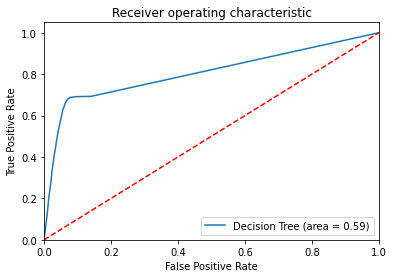

In [ ]:
dt_roc_auc = roc_auc_score(y_test, dt.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

### Creating a Random Forest with the original dataset
Create a random forest model and train it on our X train and y train datasets to help create our predictions for the X test values. The following blocks of code follow the same pattern as show for the logistic regression: model fitting, confusion matrix, metric scores, and ROC curve.

In [ ]:
# random forest for og dataset

rf = RandomForestClassifier()
rf_model= rf.fit(X_train, y_train)

y_rf_pred = rf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [ ]:
#create a confusion matrix to see how well the model did in predicting true positives
rf_cnf_matrix = metrics.confusion_matrix(y_test, y_rf_pred)
rf_cnf_matrix

array([[98474,  1346],
       [ 3129,   857]])

In [ ]:
#print scores for a clearer idea
print("Accuracy:", metrics.accuracy_score(y_test, y_rf_pred))
print("Precision:", metrics.precision_score(y_test, y_rf_pred))
print("Recall:", metrics.recall_score(y_test, y_rf_pred))
print("F1 Score:", metrics.f1_score(y_test, y_rf_pred))
print("AUC:", metrics.roc_auc_score(y_test, y_rf_pred))

Accuracy: 0.956890738492958
Precision: 0.3890149795733091
Recall: 0.21500250878073257
F1 Score: 0.27694296332202295
AUC: 0.6007591185458461


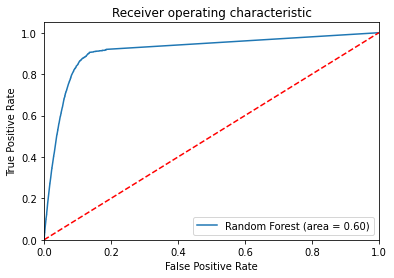

In [ ]:
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

### Creating a balanced dataset and training the previous three classifier models with this new dataset
As we noted in our EDA process, the response variable in our dataset is highly imbalanced (as can be seen in the visualization below). This can also be noticed in how our previous three models have shown to have a high accuracy but very low other metric scores. This indicates that because the current models are trained on data with a majority of the response variable indicating the hospital patients survived, then the model itself is more likely to predict that a patient will survive, even if they are actually more at risk to die given their conditions. 

Text(0, 0.5, 'Frequency')

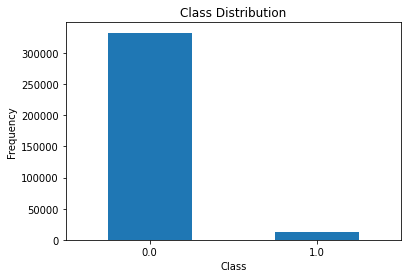

In [ ]:
count_classes = pd.value_counts(df['died'])
count_classes.plot(kind = 'bar', rot=0)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [ ]:
count_classes

0.0    332694
1.0     13323
Name: died, dtype: int64

In order to prevent this misclassification from happening, we will be creating a balanced dataset using oversampling, the process of duplicating examples from the minority class in the training dataset so the number of observations for the response variables is the same.

In [4]:
oversample = RandomOverSampler(sampling_strategy='minority', random_state=5100)
bal_X, bal_y = oversample.fit_resample(X, y)

In [ ]:
bal_count = pd.value_counts(bal_y)
bal_count

1.0    332694
0.0    332694
dtype: int64

Splitting this new balanced dataset into training and test sets.

In [5]:
#split balance training data into training and validation
bal_X_train, bal_X_test, bal_y_train, bal_y_test = train_test_split(bal_X, bal_y, 
                                                    train_size=0.7, 
                                                    random_state=5100)

### Creating a Logistic Regression model with the balanced dataset
Create a logistic regression model and train it on our X train and y train datasets to help create our predictions for the X test values. The following blocks of code follow the same pattern as show for the three previous classifier models: model fitting, confusion matrix, metric scores, and ROC curve.

In [ ]:
# log reg for bal dataset
bal_logreg = LogisticRegression(max_iter=500)

#fit the model with data
bal_lr_model = bal_logreg.fit(bal_X_train, bal_y_train)

bal_y_logreg_pred = bal_logreg.predict(bal_X_test)

In [ ]:
#create a confusion matrix to see how well the model did in predicting true positives
bal_lr_cnf_matrix = metrics.confusion_matrix(bal_y_test, bal_y_logreg_pred)
bal_lr_cnf_matrix

array([[89875,  9838],
       [ 7177, 92727]])

In [ ]:
#print scores for a clearer idea
print("Accuracy:", metrics.accuracy_score(bal_y_test, bal_y_logreg_pred))
print("Precision:", metrics.precision_score(bal_y_test, bal_y_logreg_pred))
print("Recall:", metrics.recall_score(bal_y_test, bal_y_logreg_pred))
print("F1 Score:", metrics.f1_score(bal_y_test, bal_y_logreg_pred))
print("AUC:", metrics.roc_auc_score(bal_y_test, bal_y_logreg_pred))

Accuracy: 0.9147617687872276
Precision: 0.9040803392970311
Recall: 0.9281610345932095
F1 Score: 0.9159624436333463
AUC: 0.9147489356572999


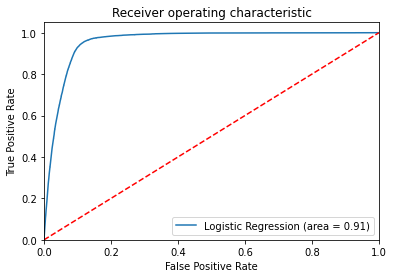

In [ ]:
bal_logit_roc_auc = roc_auc_score(bal_y_test, bal_logreg.predict(bal_X_test))
fpr, tpr, thresholds = roc_curve(bal_y_test, bal_logreg.predict_proba(bal_X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % bal_logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Creating a Decision Tree model with the balanced dataset
Create a decision tree model and train it on our X train and y train datasets to help create our predictions for the X test values. The following blocks of code follow the same pattern as show for the three previous classifier models: model fitting, confusion matrix, metric scores, and ROC curve.

In [ ]:
# decision tree for bal dataset

bal_dt = DecisionTreeClassifier()
bal_dt_model= bal_dt.fit(bal_X_train, bal_y_train)

bal_y_dt_pred = bal_dt.predict(bal_X_test)

In [ ]:
#create a confusion matrix to see how well the model did in predicting true positives
bal_dt_cnf_matrix = metrics.confusion_matrix(bal_y_test, bal_y_dt_pred)
bal_dt_cnf_matrix

array([[91620,  8093],
       [ 1628, 98276]])

In [ ]:
#print scores for a clearer idea
print("Accuracy:", metrics.accuracy_score(bal_y_test, bal_y_dt_pred))
print("Precision:", metrics.precision_score(bal_y_test, bal_y_dt_pred))
print("Recall:", metrics.recall_score(bal_y_test, bal_y_dt_pred))
print("F1 Score:", metrics.f1_score(bal_y_test, bal_y_dt_pred))
print("AUC:", metrics.roc_auc_score(bal_y_test, bal_y_dt_pred))

Accuracy: 0.9513017428375339
Precision: 0.9239158025364533
Recall: 0.9837043561819346
F1 Score: 0.9528731341474649
AUC: 0.9512707092754668


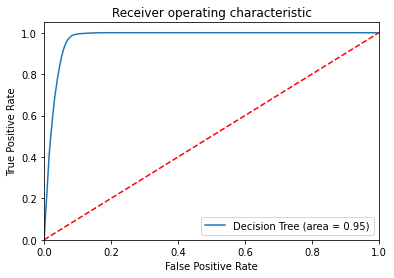

In [ ]:
bal_dt_roc_auc = roc_auc_score(bal_y_test, bal_dt.predict(bal_X_test))
fpr, tpr, thresholds = roc_curve(bal_y_test, bal_dt.predict_proba(bal_X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % bal_dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

### Creating a Random Forest model with the balanced dataset
Create a random forest model and train it on our X train and y train datasets to help create our predictions for the X test values. The following blocks of code follow the same pattern as show for the three previous classifier models: model fitting, confusion matrix, metric scores, and ROC curve.

In [6]:
# random forest for bal dataset

bal_rf = RandomForestClassifier()
bal_rf_model= bal_rf.fit(bal_X_train, bal_y_train)

bal_y_rf_pred = bal_rf.predict(bal_X_test)

In [ ]:
#create a confusion matrix to see how well the model did in predicting true positives
bal_rf_cnf_matrix = metrics.confusion_matrix(bal_y_test, bal_y_rf_pred)
bal_rf_cnf_matrix

array([[91699,  8014],
       [ 1578, 98326]])

In [ ]:
#print scores for a clearer idea
print("Accuracy:", metrics.accuracy_score(bal_y_test, bal_y_rf_pred))
print("Precision:", metrics.precision_score(bal_y_test, bal_y_rf_pred))
print("Recall:", metrics.recall_score(bal_y_test, bal_y_rf_pred))
print("F1 Score:", metrics.f1_score(bal_y_test, bal_y_rf_pred))
print("AUC:", metrics.roc_auc_score(bal_y_test, bal_y_rf_pred))

Accuracy: 0.9519579995691749
Precision: 0.924711259922501
Recall: 0.9841347693786034
F1 Score: 0.953498070097174
AUC: 0.9519271823084687


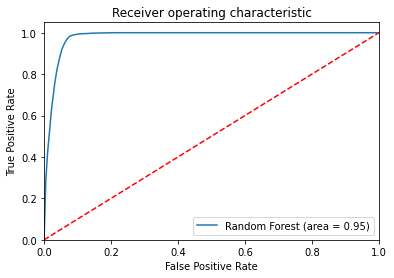

In [ ]:
bal_rf_roc_auc = roc_auc_score(bal_y_test, bal_rf.predict(bal_X_test))
fpr, tpr, thresholds = roc_curve(bal_y_test, bal_rf.predict_proba(bal_X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % bal_rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

### Model Selection Conclusions
Based on the 6 models created (3 with the original dataset and 3 with the balanced/oversampled dataset), we should choose our best one to move forward to apply to our user input section for predicting probabilities. It appears that the Random Forest model trained with the balanced dataset gives us the best results so far so we will move forward with them. In terms of feature importance, we noted that in the following two code blocks, that the top three most important features from our most optimal model are patient type (inpatient vs outpatient), age of patient, and whether or not the patient had pneumonia.

In [ ]:
ft_imp = pd.DataFrame({'Variables':bal_X.columns, 'Importance':bal_rf.feature_importances_})
ft_imp

,Variables,Importance
0,sex,0.008074
1,patient_type,0.300863
2,pneumonia,0.381322
3,age,0.170902
4,diabetes,0.019835
5,copd,0.003635
6,asthma,0.002842
7,inmsupr,0.003199
8,hypertension,0.011921
9,other_disease,0.003850


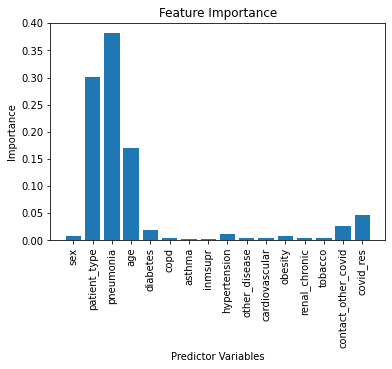

In [ ]:
# plot feature importance
pyplot.bar(ft_imp.Variables, ft_imp.Importance)
plt.xticks(rotation=90)
plt.title("Feature Importance")
plt.xlabel("Predictor Variables")
plt.ylabel("Importance")
pyplot.show()

## Creating a User object to predict their COVID survival rate
Utilizing our optimal model, in this section we create a user class object where when created, the system will prompt the user (a supposed patient at the hostpial) to enter their information such as age and other pre- existing conditions, which our model will then take in as the new 'X' and return the probability of the user's COVID survival rate given this input.

*Note: This user input code can also be found on a separate .py file on our group's GitHub repository, along with the pickle containing our optimal model to be run locally if so desired.*


In [7]:
class Predict_user():
    def __init__(self):
        #Gathering user data on input

        #printing intro text welcoming user
        print('\n\n\nHi! Please answer these questions to get a personalized probability of survival if hospitalized for COVID-19.\n\n')


        #Gathering user data for sex

        while True:
            Sex = input('\nWhat is your sex? M or F ')
            
            #Text Sanitization
            Sex = Sex.strip().capitalize()
            
            if Sex == "F" or Sex == "M":
                if Sex == "M":
                    self.Sex = 1
                else:  
                    self.Sex = 0
                break
                
            print("\n\nPlease enter 'M' or 'F' to proceed.\n\n")
            

        #Gathering user data for age

        while True:
            Age = input('\nWhat is your age? Please enter a number:      ')
            
            #Text Sanitization
            Age = Age.strip()
            
            #Text Checking
            valid_age = bool(re.search('^[0-9]{1,2}$', Age))
            
            if valid_age:
                self.Age = int(Age)
                break
                
            print("\n\nPlease enter a number from 0 to 99.\n\n")


        #Gathering user data for diabetes

        while True:
            diabetes = input('\nDo you have diabetes? Y or N      ')
            
            #Text Sanitization
            diabetes = diabetes.strip().capitalize()
            
            if diabetes == "Y" or diabetes == "N":
                if diabetes == "Y":
                    self.diabetes = 1
                else:  
                    self.diabetes = 0
                break
                
            print("\n\nPlease enter 'Y' for YES or 'N' for NO to proceed.\n\n")

            
        #Gathering user data for athsma

        while True:
            athsma = input('\nDo you have athsma? Y or N      ')
            
            #Text Sanitization
            athsma = athsma.strip().capitalize()
            
            if athsma == "Y" or athsma == "N":
                if athsma == "Y":
                    self.athsma = 1
                else:  
                    self.athsma = 0
                break
                
            print("\n\nPlease enter 'Y' for YES or 'N' for NO to proceed.\n\n")
            
            
        #Gathering user data for hypertension

        while True:
            hypertension = input('\nDo you have hypertension? Y or N      ')
            
            #Text Sanitization
            hypertension = hypertension.strip().capitalize()
            
            if hypertension == "Y" or hypertension == "N":
                if hypertension == "Y":
                    self.hypertension = 1
                else:  
                    self.hypertension = 0
                break
                
            print("\n\nPlease enter 'Y' for YES or 'N' for NO to proceed.\n\n")


            
        #Gathering user data for tobacco

        while True:
            tobacco = input('\nDo you have a smoking habit? Y or N      ')
            
            #Text Sanitization
            tobacco = tobacco.strip().capitalize()
            
            if tobacco == "Y" or tobacco == "N":
                if tobacco == "Y":
                    self.tobacco = 1
                else:  
                    self.tobacco = 0
                break
                
            print("\n\nPlease enter 'Y' for YES or 'N' for NO to proceed.\n\n")

            
            
        #Gathering user data for covid19 contact

        while True:
            contact = input('\nHave you had contact with another person with COVID-19? Y or N      ')
            
            #Text Sanitization
            contact = contact.strip().capitalize()
            
            if contact == "Y" or contact == "N":
                if contact == "Y":
                    self.contact = 1
                else:  
                    self.contact = 0
                break
                
            print("\n\nPlease enter 'Y' for YES or 'N' for NO to proceed.\n\n")

            
            
        #Gathering user data for Obesity

        while True:
            obese = input('\nAre you obese? Y or N      ')
            
            #Text Sanitization
            obese = obese.strip().capitalize()
            
            if obese == "Y" or obese == "N":
                if obese == "Y":
                    self.obese = 1
                else:  
                    self.obese = 0
                break
                
            print("\n\nPlease enter 'Y' for YES or 'N' for NO to proceed.\n\n")


        #Gathering user data for Pneumonia

        while True:
            pneumonia = input('\nDo you have pneumonia? Y or N      ')
            
            #Text Sanitization
            pneumonia = pneumonia.strip().capitalize()
            
            if pneumonia == "Y" or pneumonia == "N":
                if pneumonia == "Y":
                    self.pneumonia = 1
                else:  
                    self.pneumonia = 0
                break
                
            print("\n\nPlease enter 'Y' for YES or 'N' for NO to proceed.\n\n")



        #Gathering user data for copd

        while True:
            copd = input('\nDo you have chronic obstructive pulmonary disease(COPD)? Y or N      ')
            
            #Text Sanitization
            copd = copd.strip().capitalize()
            
            if copd == "Y" or copd == "N":
                if copd == "Y":
                    self.copd = 1
                else:  
                    self.copd = 0
                break
                
            print("\n\nPlease enter 'Y' for YES or 'N' for NO to proceed.\n\n")


        #Gathering user data for cardiovascular disease

        while True:
            cardiovascular = input('\nDo you have cardiovascular disease? Y or N      ')
            
            #Text Sanitization
            cardiovascular = cardiovascular.strip().capitalize()
            
            if cardiovascular == "Y" or cardiovascular == "N":
                if cardiovascular == "Y":
                    self.cardiovascular = 1
                else:  
                    self.cardiovascular = 0
                break
                
            print("\n\nPlease enter 'Y' for YES or 'N' for NO to proceed.\n\n")


        #Gathering user data for chronic kidney failure

        while True:
            renal_chronic = input('\nDo you have chronic kidney failure? Y or N      ')
            
            #Text Sanitization
            renal_chronic = renal_chronic.strip().capitalize()
            
            if renal_chronic == "Y" or renal_chronic == "N":
                if renal_chronic == "Y":
                    self.renal_chronic = 1
                else:  
                    self.renal_chronic = 0
                break
                
            print("\n\nPlease enter 'Y' for YES or 'N' for NO to proceed.\n\n")    

        #Gathering user data for inpatient/outpatient

        while True:
            patient_type = input('\nAre you inpatient or outpatient? I or O      ')
            
            #Text Sanitization
            patient_type = patient_type.strip().capitalize()
            
            if patient_type == "I" or patient_type == "O":
                if patient_type == "I":
                    self.patient_type = 1
                else:  
                    self.patient_type = 0
                break
                
            print("\n\nPlease enter 'I' for INPATIENT or 'O' for OUTPATIENT to proceed.\n\n")


        #Gathering user data for immunosuppression

        while True:
            inmusupr = input('\nDo you have immunosuppression? Y or N      ')
            
            #Text Sanitization
            inmusupr = inmusupr.strip().capitalize()
            
            if inmusupr == "Y" or inmusupr == "N":
                if inmusupr == "Y":
                    self.inmusupr = 1
                else:  
                    self.inmusupr = 0
                break
                
            print("\n\nPlease enter 'Y' for YES or 'N' for NO to proceed.\n\n")

            
        #Gathering user data for Other Diseases

        while True:
            other_disease = input('\nDo you have another disease not mentioned here? Y or N      ')
            
            #Text Sanitization
            other_disease = other_disease.strip().capitalize()
            
            if other_disease == "Y" or other_disease == "N":
                if other_disease == "Y":
                    self.other_disease = 1
                else:  
                    self.other_disease = 0
                break
                
            print("\n\nPlease enter 'Y' for YES or 'N' for NO to proceed.\n\n")

            

        #compiling user data into a dictionary

        User_data = {
            "sex" : [float(self.Sex)],
            "patient_type" : [float(self.patient_type)],
            "pneumonia" : [float(self.pneumonia)],
            "age" : [self.Age],
            "diabetes" : [float(self.diabetes)],
            "copd" : [float(self.copd)],
            "asthma" : [float(self.athsma)],
            "inmsupr" : [float(self.inmusupr)],
            "hypertension" : [float(self.hypertension)],
            "other_disease" : [float(self.other_disease)],
            "cardiovascular" : [float(self.cardiovascular)],
            "obesity" : [float(self.obese)],
            "renal_chronic" : [float(self.renal_chronic)],
            "tobacco" : [float(self.tobacco)],
            "contact_other_covid" : [float(self.contact)],
            "covid_res" : [1.0]
        }

        User_data = pd.DataFrame(User_data)

        User_list = list(bal_rf.predict_proba(User_data))

        print("\n\n\nHere are your results...\n\nAfter loading YOUR data into our model, we predict you have a ",round(User_list[0][0], 2)*100, "% percent chance of survival if hospitalized for COVID-19\n\n\n", sep = "")

        self.User_data = User_data
        self.predicted_survival = round(User_list[0][0], 2)*100

    def __str__(self):
        return print("This users data is:",self.user_data,"\nPredicted Survival rate is",self.predicted_survival)

Running the line of code below will prompt user input and return the user's survival rate.

In [8]:
User1 = Predict_user()




Hi! Please answer these questions to get a personalized probability of survival if hospitalized for COVID-19.



What is your sex? M or F F

What is your age? Please enter a number:      77

Do you have diabetes? Y or N      Y

Do you have athsma? Y or N      Y

Do you have hypertension? Y or N      


Please enter 'Y' for YES or 'N' for NO to proceed.



Do you have hypertension? Y or N      Y

Do you have a smoking habit? Y or N      Y

Have you had contact with another person with COVID-19? Y or N      Y

Are you obese? Y or N      N

Do you have pneumonia? Y or N      Y

Do you have chronic obstructive pulmonary disease(COPD)? Y or N      N

Do you have cardiovascular disease? Y or N      N

Do you have chronic kidney failure? Y or N      Yn


Please enter 'Y' for YES or 'N' for NO to proceed.



Do you have chronic kidney failure? Y or N      Y

Are you inpatient or outpatient? I or O      I

Do you have immunosuppression? Y or N      N

Do you have another disease not mentione

## Testing our user input section with Unit Tests
In order to ensure that there are no bugs or errors in our User object, we conducted several unit tests on the class. This was done by creating a test user with specific parameters, then testing aspects of the user to ensure that the data was properly stored.

In [9]:
# import the unit test package
import unittest

# create a user with following attributes when prompted: 
    # male, smokes, contact with other with covid, has copd, 29 y/o, outpatient
    # tests below to ensure the values in our user input class work properly

test_user = Predict_user()

#create a set of unit tests to ensure each user input value is being saved properly

class MyTest(unittest.TestCase):

    def test_the_sex(self):
        self.assertEqual(test_user.Sex, 1)

    def test_the_diabetes(self):
        self.assertEqual(test_user.diabetes, 0)

    def test_the_athsma(self):
        self.assertEqual(test_user.athsma, 0)

    def test_the_hypertension(self):
        self.assertEqual(test_user.hypertension, 0)

    def test_the_obesity(self):
        self.assertEqual(test_user.obese, 0)

    def test_the_pneumonia(self):
        self.assertEqual(test_user.pneumonia, 0)

    def test_the_otherdisease(self):
        self.assertEqual(test_user.other_disease, 0)

    def test_the_cardiovascular(self):
        self.assertEqual(test_user.cardiovascular, 0)

    def test_the_renalchronic(self):
        self.assertEqual(test_user.renal_chronic, 0)

    def test_the_patient_type(self):
        self.assertEqual(test_user.patient_type, 0)

    def test_the_tobacco(self):
        self.assertEqual(test_user.tobacco, 1)

    def test_the_contact(self):
        self.assertEqual(test_user.contact, 1)

    def test_the_copd(self):
        self.assertEqual(test_user.copd, 1)
        
    def test_the_age(self):
        self.assertEqual(test_user.Age, 29)

unittest.main(argv=[''], verbosity=2, exit=False)




Hi! Please answer these questions to get a personalized probability of survival if hospitalized for COVID-19.



What is your sex? M or F M

What is your age? Please enter a number:      29

Do you have diabetes? Y or N      N

Do you have athsma? Y or N      N

Do you have hypertension? Y or N      N

Do you have a smoking habit? Y or N      Y

Have you had contact with another person with COVID-19? Y or N      Y

Are you obese? Y or N      N

Do you have pneumonia? Y or N      N

Do you have chronic obstructive pulmonary disease(COPD)? Y or N      Y

Do you have cardiovascular disease? Y or N      N

Do you have chronic kidney failure? Y or N      N

Are you inpatient or outpatient? I or O      O

Do you have immunosuppression? Y or N      N

Do you have another disease not mentioned here? Y or N      N


test_the_age (__main__.MyTest) ... ok
test_the_athsma (__main__.MyTest) ... ok
test_the_cardiovascular (__main__.MyTest) ... ok
test_the_contact (__main__.MyTest) ... ok
test_the_copd (__main__.MyTest) ... ok
test_the_diabetes (__main__.MyTest) ... ok
test_the_hypertension (__main__.MyTest) ... ok
test_the_obesity (__main__.MyTest) ... ok
test_the_otherdisease (__main__.MyTest) ... ok
test_the_patient_type (__main__.MyTest) ... ok
test_the_pneumonia (__main__.MyTest) ... ok
test_the_renalchronic (__main__.MyTest) ... ok
test_the_sex (__main__.MyTest) ... ok
test_the_tobacco (__main__.MyTest) ... 




Here are your results...

After loading YOUR data into our model, we predict you have a 95.0% percent chance of survival if hospitalized for COVID-19





ok

----------------------------------------------------------------------
Ran 14 tests in 0.027s

OK


Tests ran successfully!